In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_En  = LabelEncoder()

data.species = lb_En.fit_transform(data.species)
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df1 = data[data.species ==0]
df2 = data[data.species ==1]
df3 = data[data.species ==2]


Text(0, 0.5, 'sepal width')

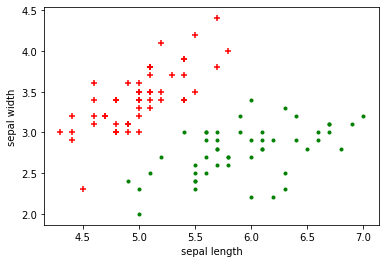

In [7]:
plt.scatter(df1.sepal_length,df1.sepal_width, color = 'red', marker = "+")
plt.scatter(df2.sepal_length,df2.sepal_width, color = 'green', marker = ".")
plt.xlabel('sepal length')
plt.ylabel('sepal width')


Text(0, 0.5, 'petal width')

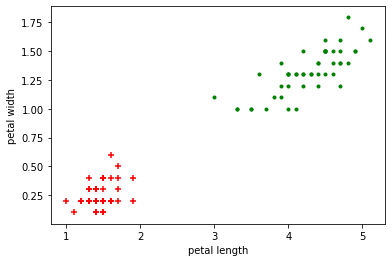

In [8]:
plt.scatter(df1.petal_length,df1.petal_width, color = 'red', marker = "+")
plt.scatter(df2.petal_length,df2.petal_width, color = 'green', marker = ".")
plt.xlabel('petal length')
plt.ylabel('petal width')


In [21]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]       # or data.species 
display(X,y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [22]:

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(X,y, test_size= 0.2)


In [25]:

from sklearn.svm import SVC

sv_model = SVC()

In [26]:

sv_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:

y_pred = sv_model.predict(x_test)


In [28]:

# accuracy
sv_model.score(x_train,y_train)

0.9833333333333333

In [29]:

sv_model.score(x_test,y_test)

0.9333333333333333

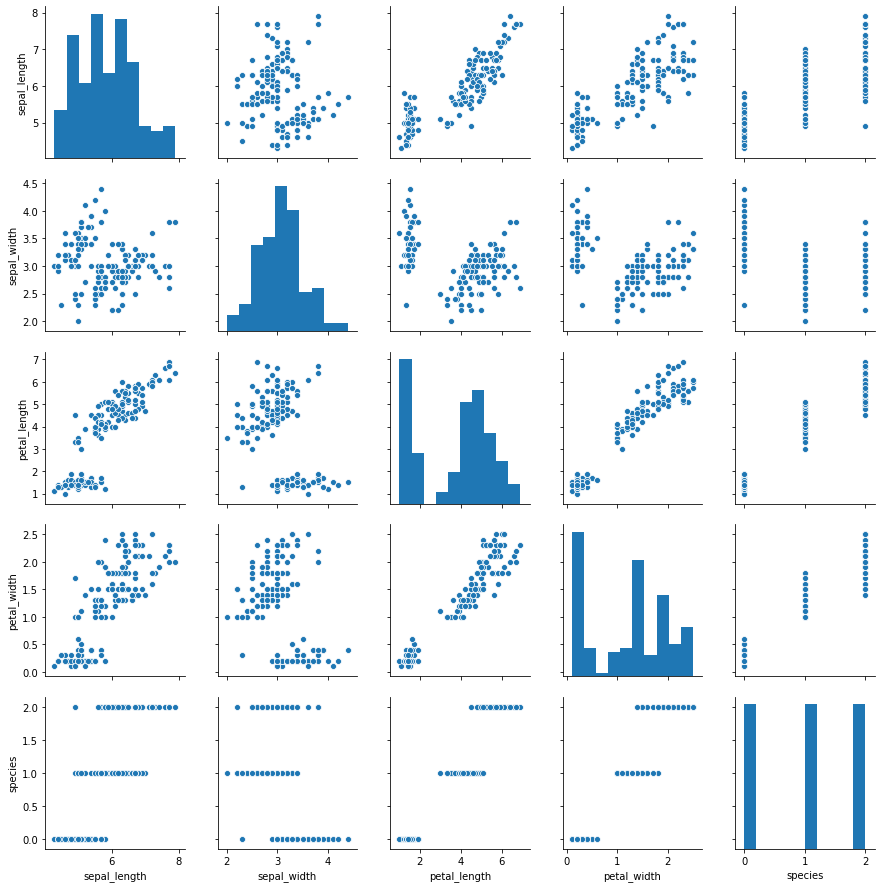

In [30]:
sns.pairplot(data)

In [39]:
model_param = {
    
'svm':{
        'model':SVC(gamma= 'auto'),
        'param':{
        'C':[1,10,20]
            ,
        'kernel':['rbf','linear'] }
}
}

In [40]:
from sklearn.model_selection import GridSearchCV


In [41]:
scores = []

for model_name,mp in model_param.items():
    
    gr_search = GridSearchCV(mp['model'],mp['param'], cv=5, return_train_score=False)
    gr_search.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score': gr_search.best_score_,
        'best_param': gr_search.best_params_        
    })

In [42]:
df = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df


,model,best_score,best_param
0,svm,0.98,"{'C': 1, 'kernel': 'rbf'}"
